<a href="https://colab.research.google.com/github/shaanbarca/graduation_project/blob/main/geopandas_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python --version

Python 3.7.13


In [ ]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install folium==0.12.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import folium
from folium import Choropleth, Circle, Marker
import difflib 
import fiona
import geopandas as gpd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from folium.plugins import HeatMap, MarkerCluster

# ----------------------------------------------
fiona.supported_drivers
fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['KML'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['CSV'] = 'rw'
#-------------------------------------------
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import IPython
from IPython.display import display
from google.colab import drive

In [ ]:
print(folium.__version__)

0.12.1


In [ ]:
# test geospatial
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

def descriptive_table(data):
  " Function that outputs descriptive data "
 
  sum_table = data.describe().round(1)
  sum_table = sum_table.T
  return sum_table


In [ ]:
full_data = gpd.read_file("/content/gdrive/MyDrive/gp/geospatial/spatial_map/Batas Desa terbaru Maret 2020/Batas Desa terbaru Maret 2020.shp")
city_df = pd.read_excel('/content/gdrive/MyDrive/gp/GP2/normalized_gp2_data.xlsx')

In [ ]:
full_data.head()

,OBJECTID,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,METADATA,KDEBPS,KDEPUM,KDCBPS,KDCPUM,KDBBPS,WADMKD,WIADKD,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,KDPKAB,SHAPE_Leng,SHAPE_Area,geometry
0,1.0,13/15,Sinamar/Tanjung Belit,None,None,BA03070040,0.0,Delineasi Batas Wilayah Administrasi Desa Seca...,SRGI 2013,TASWIL1000020200326DATA_BATAS_DESA_KELURAHAN,None,13.10.10.2005/15.08.04.2001,None,13.10.01/15.08.04,None,Sinamar/Tanjung Belit,0,Asam Jujuhan/Jujuhan,None,Dharmasraya/Bungo,None,Sumatera Barat/Jambi,None,1.0,13.10/15.08,0.042521,1.616207e-05,"MULTIPOLYGON Z (((101.69765 -1.39261 0.00000, ..."
1,2.0,13/15,Koto Gadang/Ujung Tanjung,None,None,BA03070040,0.0,Delineasi Batas Wilayah Administrasi Desa Seca...,SRGI 2013,TASWIL1000020200326DATA_BATAS_DESA_KELURAHAN,None,13.10.11.2003/15.08.04.2005,None,13.10.11/15.08.04,None,Koto Gadang/Ujung Tanjung,0,Koto Besar/Jujuhan,None,Dharmasraya/Bungo,None,Sumatera Barat/Jambi,None,1.0,13.10/15.08,0.046491,6.111717e-06,"MULTIPOLYGON Z (((101.69618 -1.28864 0.00000, ..."
2,3.0,13/15,Sungai Rumbai/Sirih Sekapur,None,None,BA03070040,0.0,Hasil Kegiatan PNBP Tahun 2018,SRGI 2013,TASWIL1000020200326DATA_BATAS_DESA_KELURAHAN,None,13.10.11.2003/15.08.04.2004,None,13.10.11/15.08.04,None,Sungai Rumbai/Sirih Sekapur,0,Koto Besar/Jujuhan,None,Dharmasraya/Bungo,None,Sumatera Barat/Jambi,None,1.0,13.10/15.08,0.001778,1.556846e-07,"POLYGON Z ((101.72236 -1.24136 0.00000, 101.72..."
3,4.0,None,None,None,None,BA03070040,0.0,Hasil Delineasi Tahun 2018,SRGI 2013,TASWIL1000020200326DATA_BATAS_DESA_KELURAHAN,None,None,None,None,None,None,0,None,None,None,None,None,None,0.0,None,0.240943,2.357319e-03,"POLYGON Z ((98.15347 2.20416 0.00000, 98.15338..."
4,5.0,13,Area Tidak Terdefinisi,pulau,None,BA03070040,0.0,Hasil Delineasi Tahun 2018,SRGI 2013,TASWIL1000020200326DATA_BATAS_DESA_KELURAHAN,None,13.01.15.2001,None,13.01.15,None,None,0,None,None,Kota Padang,None,Sumatera Barat,None,1.0,13.01,0.012081,6.289564e-07,"MULTIPOLYGON Z (((100.17205 -1.13490 0.00000, ..."


In [ ]:
sub_data = full_data[['WADMKK','geometry']]
sub_data = sub_data.dropna(axis=0)


# How to aggregate spatial data

In [ ]:
sub_data['geometry'] = sub_data.buffer(0.01) # prevents overlap

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [ ]:
 # joing on this
plot_df = sub_data.dissolve(by='WADMKK')

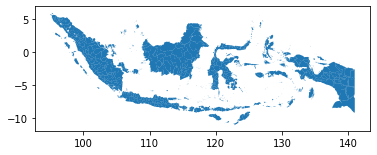

In [ ]:
plot_df.plot()

In [ ]:
plot_df["kota"] = plot_df.index


# Merge data with inconsistent names

In [ ]:
# merge data
city_df['key']=city_df['Kabupaten/Kota'].apply(lambda x : [process.extract(x, plot_df['kota'], limit=1)][0][0][0])
final_df = city_df.merge(plot_df,left_on='key',right_on='kota')

In [ ]:
final_df = city_df.merge(plot_df,left_on='key',right_on='kota')

In [ ]:
gdf = gpd.GeoDataFrame(final_df, crs="EPSG:4326", geometry='geometry')

In [ ]:
final_df.head()

,Unnamed: 0,Provinsi,Kabupaten/Kota,Jumlah Kecamatan,Jumlah Desa,Jumlah Kelurahan,Jumlah Penduduk,Jumlah KK,Luas Wilayah (km2),Kepadatan Penduduk,Perpindahan Penduduk,Jumlah Meninggal,Perubahan Data,Wajib KTP,Kepercayaan terhadap Tuhan YME,Laki-Laki,Perempuan,Belum Kawin,Kawin,Cerai Hidup,Cerai Mati,Usia 0-4 thn,Usia 5-9 thn,Usia 10-14 thn,Usia 15-19 thn,Usia 20-24 thn,Usia 25-29 thn,Usia 30-34 thn,Usia 35-39 thn,Usia 40-44 thn,Usia 45-49 thn,Usia 50-54 thn,Usia 55-59 thn,Usia 60-64 thn,Usia 65-69 thn,Usia 70-74 thn,Usia 75 thn ke Atas,Lahir thn 2018,Lahir sebelum thn 2018,Pertumbuhan penduduk thn 2016 (%),Pertumbuhan penduduk thn 2017 (%),Pertumbuhan penduduk thn 2018 (%),Pertumbuhan penduduk thn 2019 (%),Pertumbuhan penduduk thn 2020 (%),Usia sekolah 3-4 thn,Usia sekolah 5 thn,Usia sekolah 6-11 thn,Usia sekolah 12-24 thn,Usia sekolah 15-17 thn,Usia sekolah 18-22 thn,Belum/Tidak Bekerja,Aparatur Pejabat Negara,Tenaga Pengajar,Wiraswasta,Pertanian dan Peternakan,Nelayan,Agama dan Kepercayaan,Pelajar dan Mahasiswa,Tenaga Kesehatan,Pensiunan,Pekerjaan Lainnya,f4_18_tahun_pendidikan_khusus,f5_6_tahun_paud,f7_12_tahun_sd,f12_15_tahun_smp,f16_18_tahun_sma,lahir_thn4,lahir_thn5,lahir_thn6,lahir_seb4,lahir_seb5,lahir_seb6,jml_rek_wktp,percentage_Islam,percentage_Kristen,percentage_Katholik,percentage_Hindu,percentage_Budha,percentage_Konghucu,percentage_no/havent_school,Not_finished_elementary,elementary_school_percentage,middle_school_percentage,high_school_percentage,vocational_school_percentage,highervocational_school_percentage,Bachelors_percentage,Masters_percentage,Phd_percentage,Non_Islam,PAD per Capita,key,geometry,kota
0,0,ACEH,PIDIE,23,730,0,435797,132522,3133,139,220656,828,415357,310044,0,215141,220656,225988,181831,5193,22785,9,9,9,8,8,8,8,7,6,5,4,3,3,2,1,2,8079,408225,2,2,2,2,1,16292,8068,48107,25478,20725,39859,20,2,0,13,13,0,0,27,0,0,20,120380,15873,48563,24283,23749,8079,7279,4154,416304,424364,431643,291447,99,0,0,0,0,0,20,13,14,16,27,0,1,4,0,0,0,3495.361372,Pidie,"POLYGON ((95.82560 4.95738, 95.82552 4.95746, ...",Pidie
1,1,ACEH,SIMEULUE,10,138,0,94368,25611,1821,52,45990,282,85629,66453,1,48378,45990,49594,39717,610,4447,8,9,9,10,9,7,7,7,7,5,4,3,2,1,1,1,1730,88807,2,2,2,2,1,3609,1809,10948,5618,6097,9249,22,4,0,10,10,4,0,27,0,0,19,28471,3598,11017,6120,5936,1730,1406,827,90537,92135,93541,60677,99,0,0,0,0,0,20,12,21,14,21,1,1,5,0,0,0,9186.715836,Simeulue,"MULTIPOLYGON (((95.86176 2.62539, 95.86136 2.6...",Simeulue
2,2,ACEH,KOTA BANDA ACEH,9,90,0,253198,74245,55,4534,126525,939,231423,171676,0,126673,126525,129688,111174,2826,9510,10,10,10,6,6,8,9,9,7,6,4,3,2,1,0,1,5294,234368,2,2,2,2,1,10717,5219,31419,15733,10519,17130,27,8,1,21,0,0,0,20,0,1,17,69650,10564,31682,13664,8506,5294,4838,3538,239662,244822,249660,168067,98,0,0,0,1,0,25,9,5,9,29,1,4,13,1,0,1,6026.856452,Kota Banda Aceh,"POLYGON ((95.30167 5.51079, 95.30164 5.51080, ...",Kota Banda Aceh
3,3,ACEH,KOTA SABANG,3,18,0,42696,12850,122,350,21161,175,40653,29413,0,21535,21161,22259,17601,742,2094,10,10,9,8,7,7,8,8,7,6,4,3,2,2,1,1,848,39601,2,2,2,2,2,1664,842,5145,2590,2357,3365,25,7,0,14,2,3,0,22,0,1,20,12427,1704,5206,2440,2231,848,836,652,40449,41208,42044,27162,78,0,0,0,0,0,23,11,12,13,29,0,2,5,0,0,21,9202.360877,Kota Sabang,"MULTIPOLYGON (((95.31938 5.76400, 95.31922 5.7...",Kota Sabang
4,4,ACEH,KOTA LANGSA,5,66,0,185836,53727,217,856,92425,441,165304,134356,4,93411,92425,96768,77728,3198,8142,8,8,9,8,8,7,8,8,7,6,5,4,3,2,1,1,3164,174490,2,2,2,2,1,6513,3121,19933,10309,9794,16879,32,6,1,18,1,1,0,15,0,0,21,49937,6313,20358,10101,10084,3164,3023,1989,177654,180824,183847,117620,99,0,0,0,0,0,29,7,13,12,27,0,1,6,0,0,0,3994.683484,Kota Langsa,"POLYGON ((97.95893 4.43154, 97.95740 4.43147, ...",Kota Langsa


In [ ]:
test_gdf = gdf[['Kabupaten/Kota','PAD per Capita','geometry','Bachelors_percentage','highervocational_school_percentage','high_school_percentage']]
test_gdf['Kabupaten/Kota'] = test_gdf['Kabupaten/Kota'].astype(str)

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
test_gdf = test_gdf.set_index('Kabupaten/Kota')

In [ ]:
test_gdf.head()

,PAD per Capita,geometry,Bachelors_percentage,highervocational_school_percentage,high_school_percentage
Kabupaten/Kota,,,,,
PIDIE,3495.361372,"POLYGON ((95.82560 4.95738, 95.82552 4.95746, ...",4,1,27
SIMEULUE,9186.715836,"MULTIPOLYGON (((95.86176 2.62539, 95.86136 2.6...",5,1,21
KOTA BANDA ACEH,6026.856452,"POLYGON ((95.30167 5.51079, 95.30164 5.51080, ...",13,4,29
KOTA SABANG,9202.360877,"MULTIPOLYGON (((95.31938 5.76400, 95.31922 5.7...",5,2,29
KOTA LANGSA,3994.683484,"POLYGON ((97.95893 4.43154, 97.95740 4.43147, ...",6,1,27


# START HERE

In [ ]:
test_gdf.to_csv('indonesia_geo_final.csv')

In [ ]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))
fig, ax = plt.subplots(ncols=2)

cmap = plt.get_cmap('RdPu')
new_cmap = truncate_colormap(cmap, 0.3, 1)

ax[0].imshow(arr, interpolation='nearest', cmap=cmap)
ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)
plt.show()


In [ ]:
# gdp per capita
fig, ax = plt.subplots(1, figsize=(12,8))
test_gdf.plot(column='PAD per Capita', cmap=new_cmap, linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
ax.set_title('Indonesian cities/regencies by GDP Per Capita', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig.savefig("Indonesia_gdp_spatial.png", dpi=300)

In [ ]:
# bachelors percentage
fig, ax = plt.subplots(1, figsize=(12,8))
test_gdf.plot(column='Bachelors_percentage', cmap=new_cmap, linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
ax.set_title('Indonesian cities/regencies by Bachelors', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig.savefig("Indonesia_gdp_spatial_educ_bach.png", dpi=300)

In [ ]:
# gdp per capita
fig, ax = plt.subplots(1, figsize=(12,8))
test_gdf.plot(column='high_school_percentage', cmap=new_cmap, linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
ax.set_title('Indonesian cities/regencies by highschool', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig.savefig("Indonesia_gdp_spatial_educ_high.png", dpi=300)

In [ ]:
test_gdf['kota'] = test_gdf.index
m = test_gdf.explore(
    column = 'PAD per Capita',
    tooltip=['PAD per Capita','kota','Bachelors_percentage'], # show "BoroName" value in tooltip (on hover)
    popup=True, # show all values in popup (on click)
    tiles="CartoDB positron", # use "CartoDB positron" tiles
    scheme="naturalbreaks", # use "Set1" matplotlib colormap
    k=4,
    name='kota',
    style_kwds=dict(color="black") # use black outline
)
folium.LayerControl().add_to(m) 
#m.save('my_map_test_final_final_super_5.html')

In [ ]:
test_gdf = test_gdf.to_crs(4326)
test_gdf['lon'] = test_gdf.centroid.x  
test_gdf['lat'] = test_gdf.centroid.y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [ ]:
descriptive_table(test_gdf)

,count,mean,std,min,25%,50%,75%,max
PAD per Capita,507.0,3171.7,2752.9,0.0,1550.1,2439.5,4048.0,25239.9
Bachelors_percentage,507.0,3.8,2.2,0.0,2.0,3.0,5.0,15.0
highervocational_school_percentage,507.0,0.7,0.8,0.0,0.0,1.0,1.0,4.0
high_school_percentage,507.0,19.2,6.8,2.0,14.0,18.0,23.0,41.0
lon,507.0,113.4,11.1,95.3,104.5,111.7,120.7,140.8
lat,507.0,-3.1,3.9,-10.7,-6.8,-3.3,-0.0,5.9


In [ ]:
# overlay with educ

def color_producer(val):
  if val  >= 5 :
    return 'forestgreen'
  elif val >= 3:
    return 'yellow'
  else:
      return 'darkred'

# Add a bubble map to the base map
for i in range(0,len(test_gdf)):
    Circle(
        location=[test_gdf.iloc[i]['lat'], test_gdf.iloc[i]['lon']],
        radius=20,
        legend = True,
        color=color_producer(test_gdf.iloc[i]['Bachelors_percentage'])).add_to(m)

# Display the map
m.save('indonesia_map_centroids_finalww.html')